# An introduction to seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.



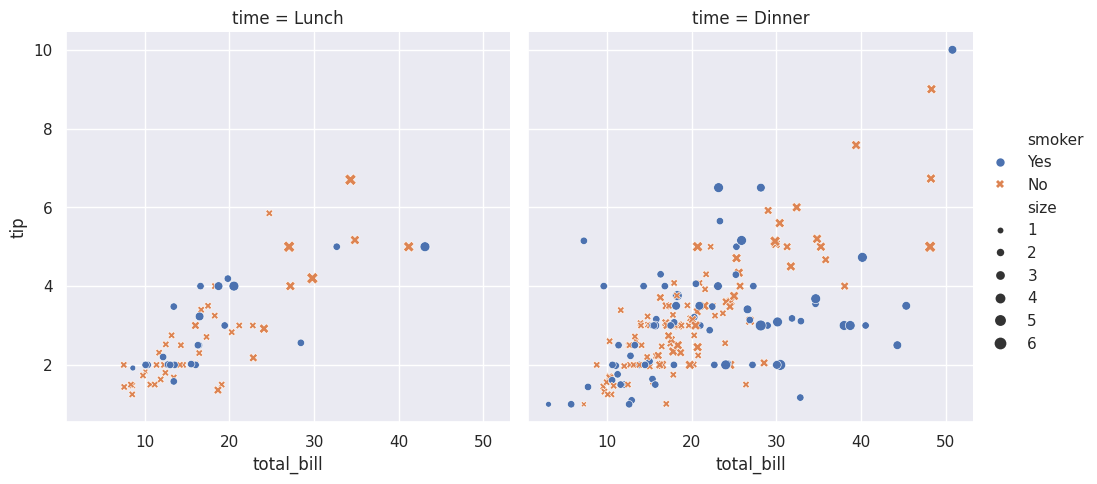

In [44]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size", data=tips)

The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter that lets you easily switch to this alternate representation:

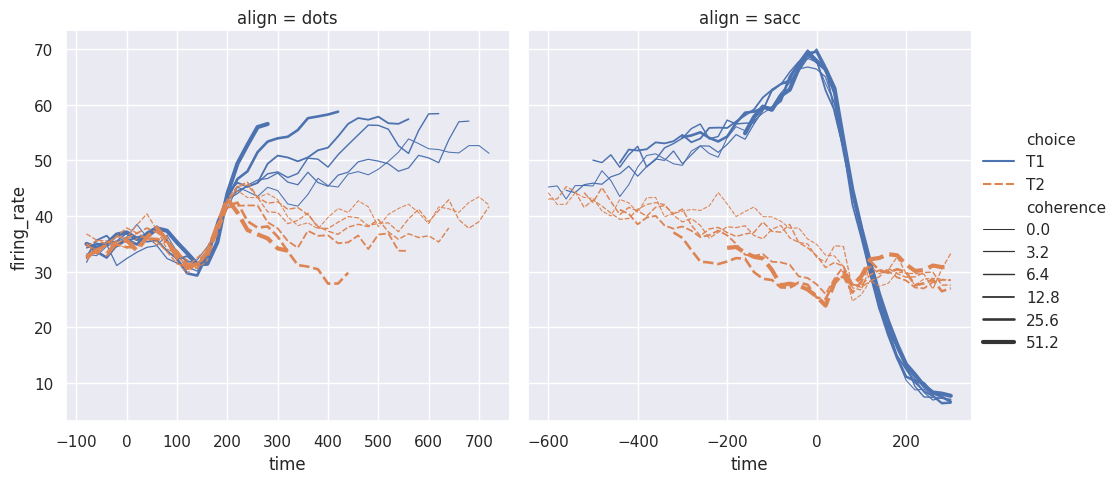

In [45]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

### Statistical estimation

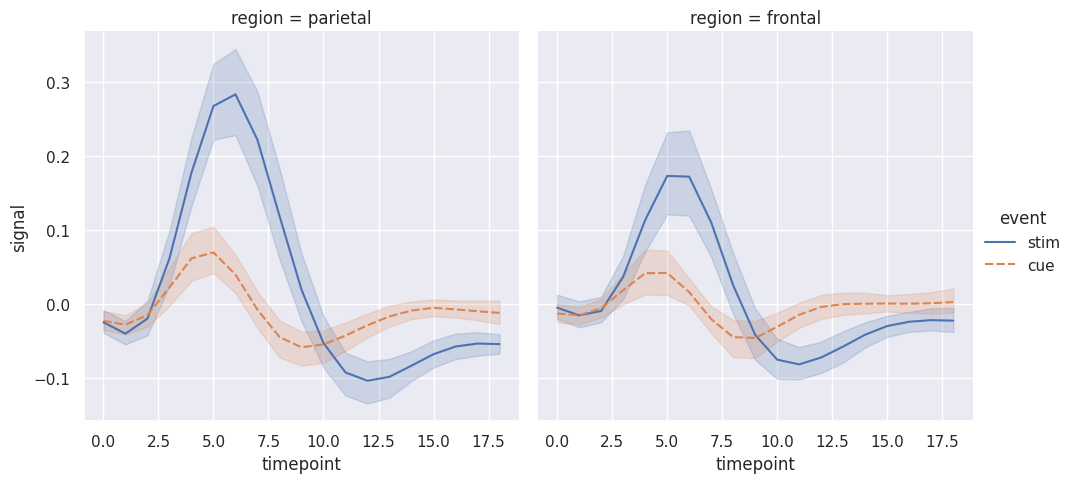

In [46]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using 
#### lmplot()

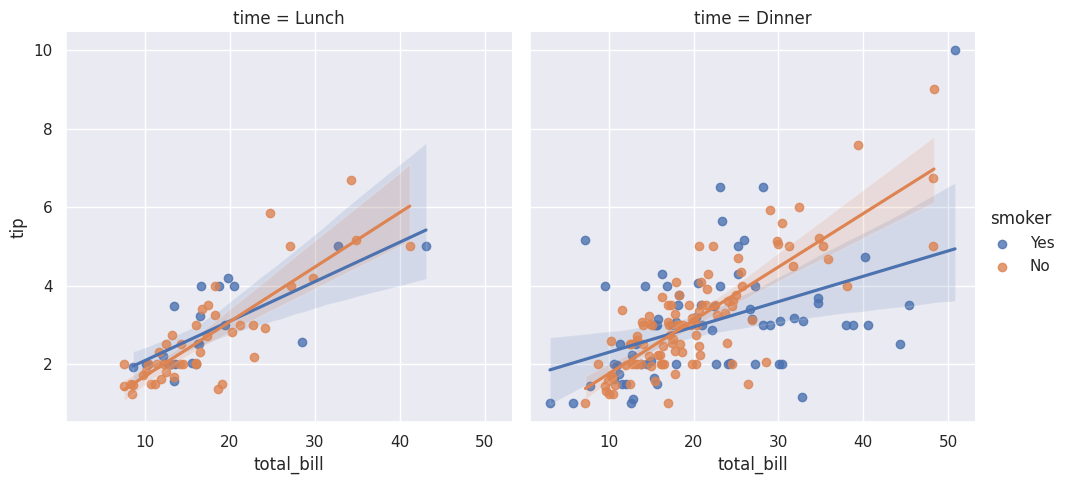

In [47]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### Distributional representations

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

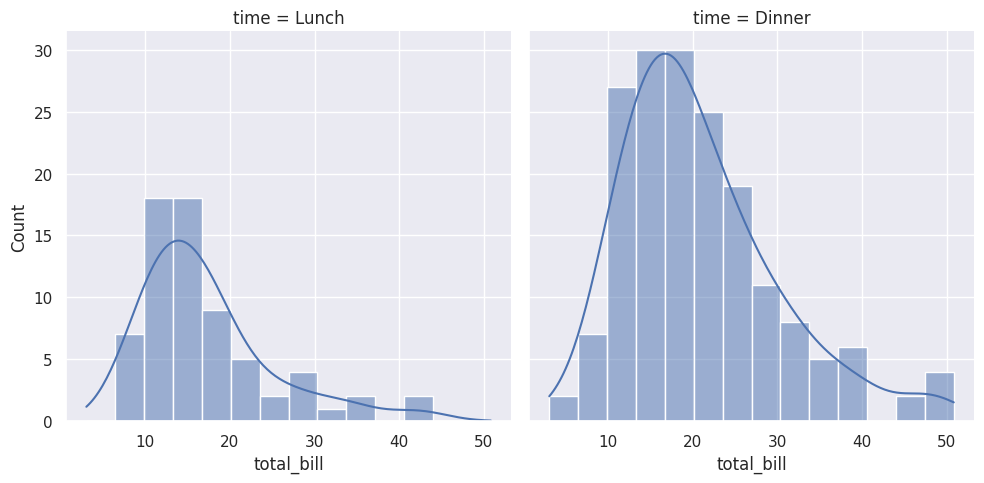

In [48]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

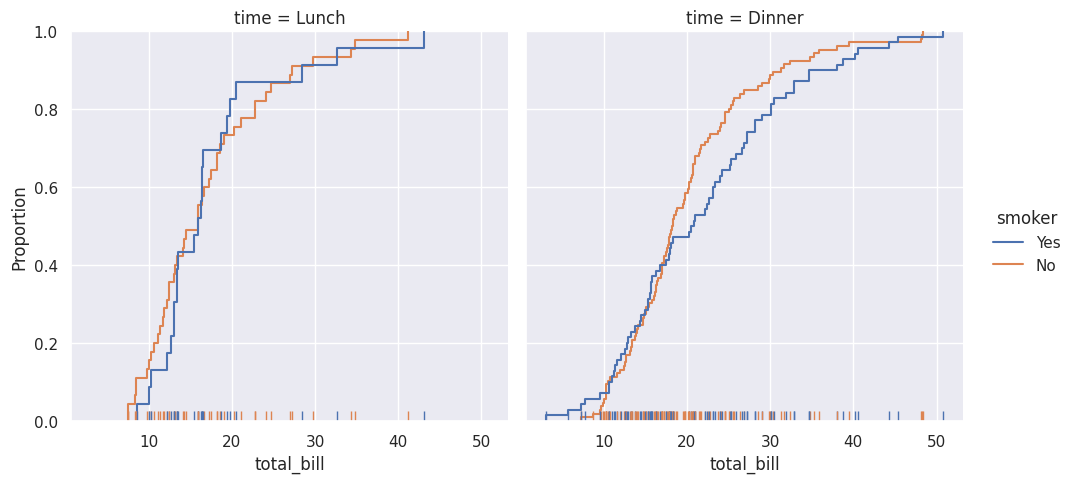

In [49]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

### Plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through catplot(). 

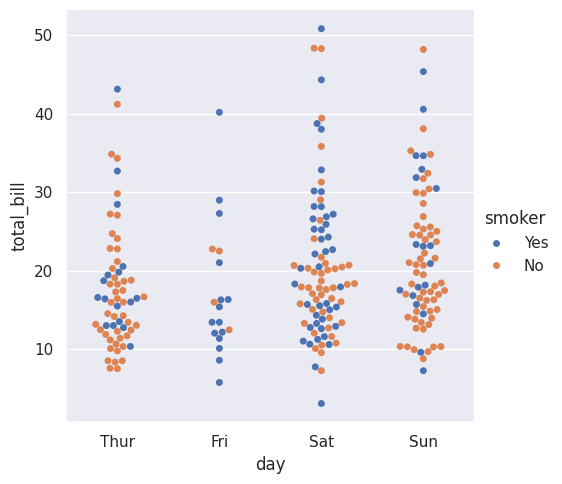

In [50]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

## To display different kinds of plots (strip, box, violin, etc.) side by side, use matplotlib subplots and the axes-level functions:

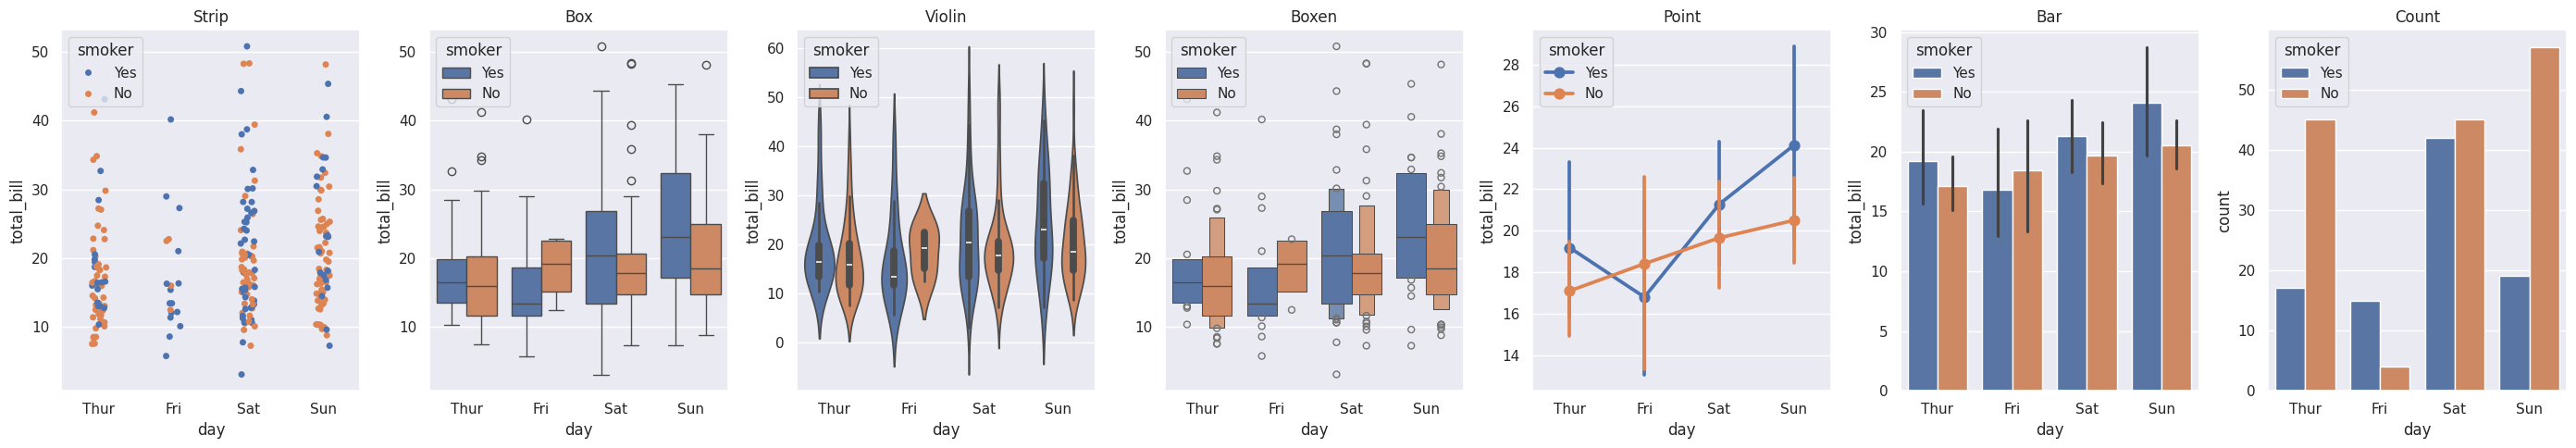

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(28, 5))  # 7 plots side by side

sns.stripplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[0])
axes[0].set_title("Strip")

sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[1])
axes[1].set_title("Box")

sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[2])
axes[2].set_title("Violin")

sns.boxenplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[3])
axes[3].set_title("Boxen")

sns.pointplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[4])
axes[4].set_title("Point")

sns.barplot(data=tips, x="day", y="total_bill", hue="smoker", ax=axes[5])
axes[5].set_title("Bar")

sns.countplot(data=tips, x="day", hue="smoker", ax=axes[6])
axes[6].set_title("Count")

plt.tight_layout()
plt.show()

## Multivariate views on complex datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

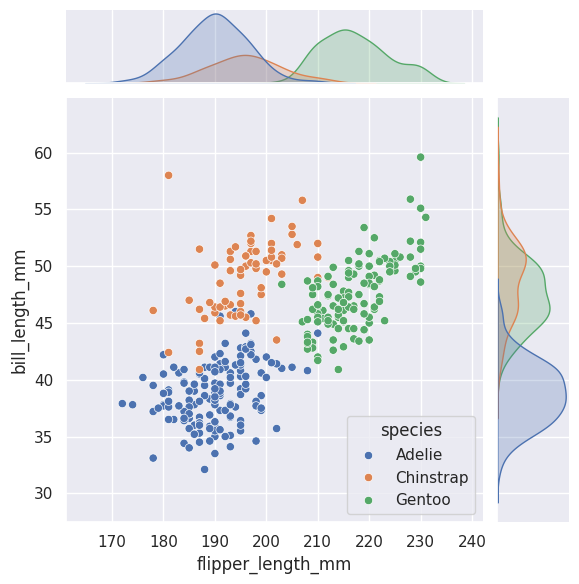

In [52]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [53]:
print("Visualizations created successfully.")
print("="*80)
print("peguins dataset:", penguins.head())
print("penguins dataset shape:", penguins.shape)
print("--"*40)
print("penguins dataset description:", penguins.columns)

Visualizations created successfully.
peguins dataset:   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
penguins dataset shape: (344, 7)
--------------------------------------------------------------------------------
penguins dataset description: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:


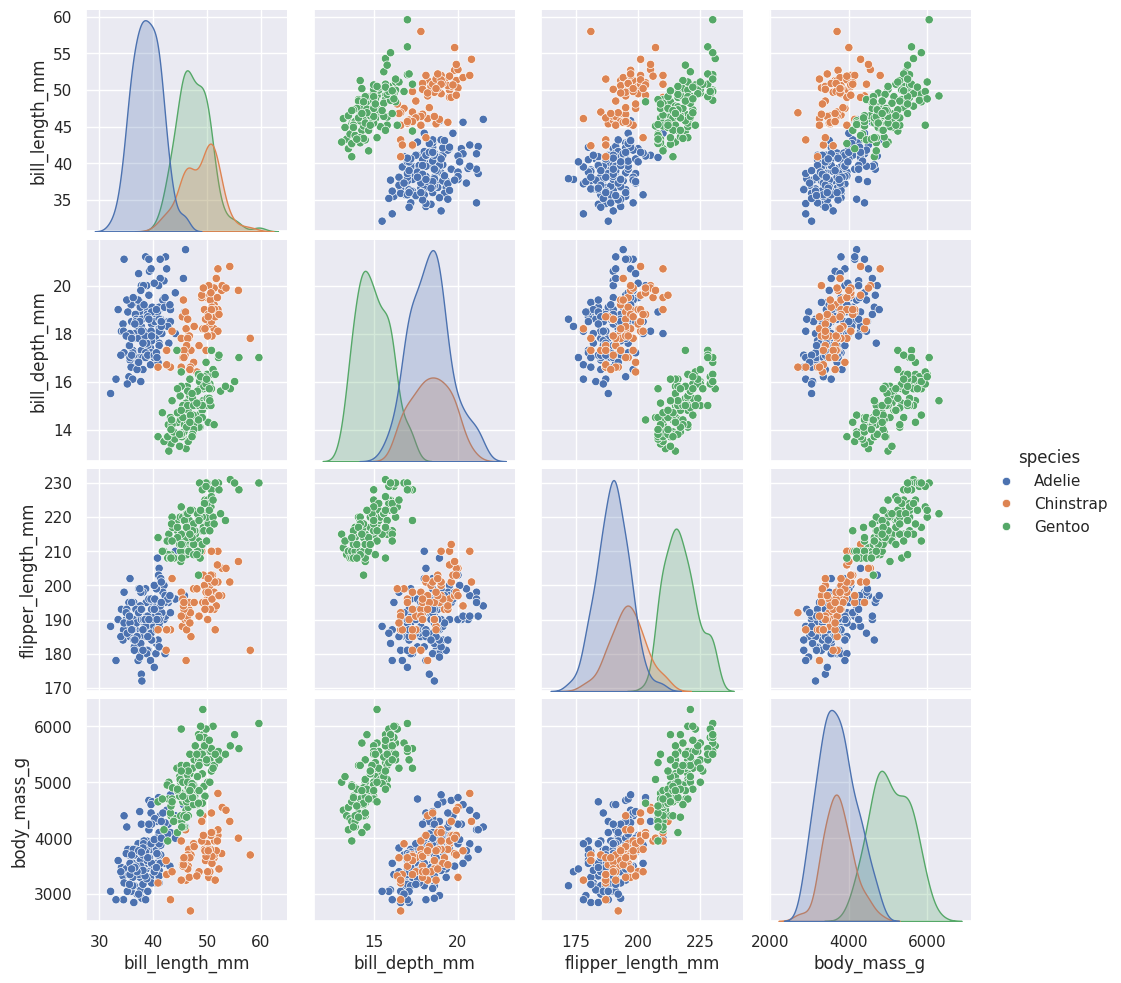

In [43]:
sns.pairplot(data=penguins, hue="species")

## Lower-level tools for building figures


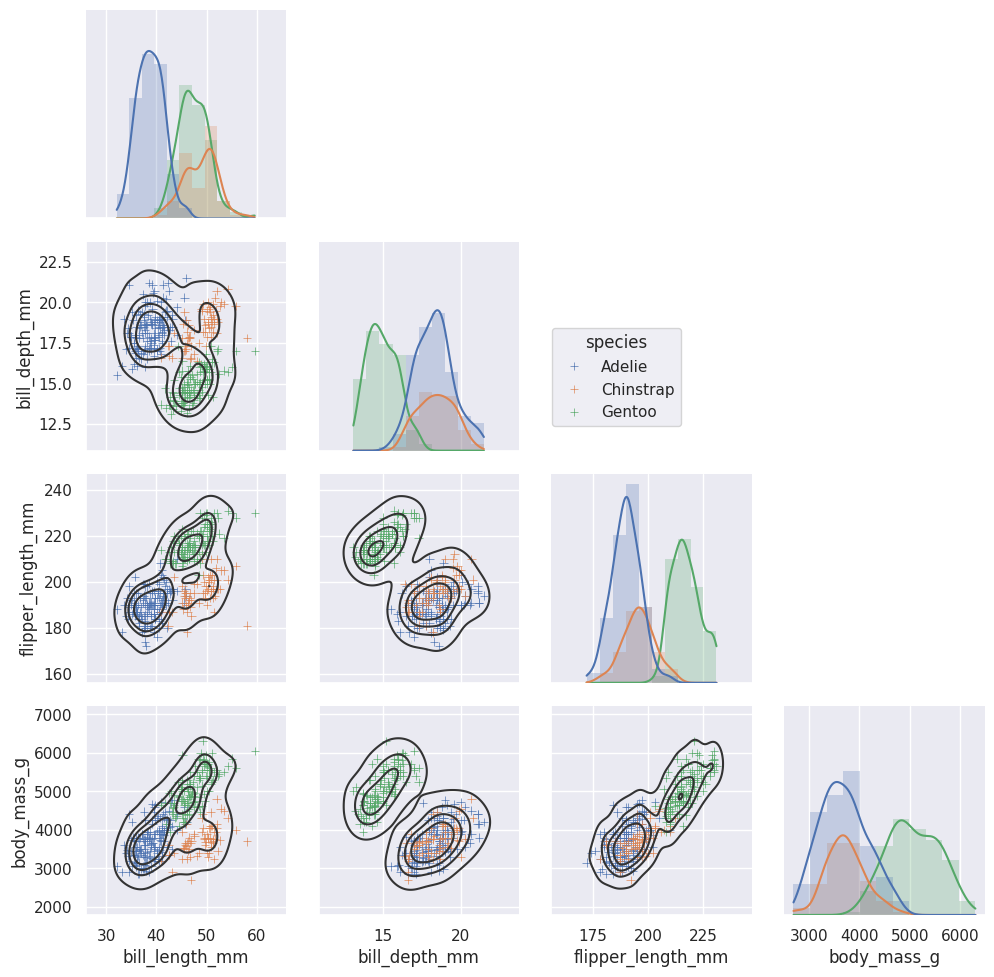

In [54]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

## Opinionated defaults and flexible customization

Seaborn creates complete graphics with a single function call: when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot.

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


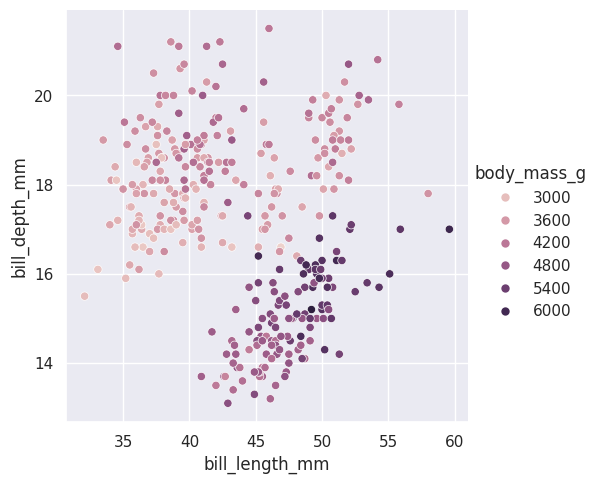

In [60]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
)

print(penguins.columns)

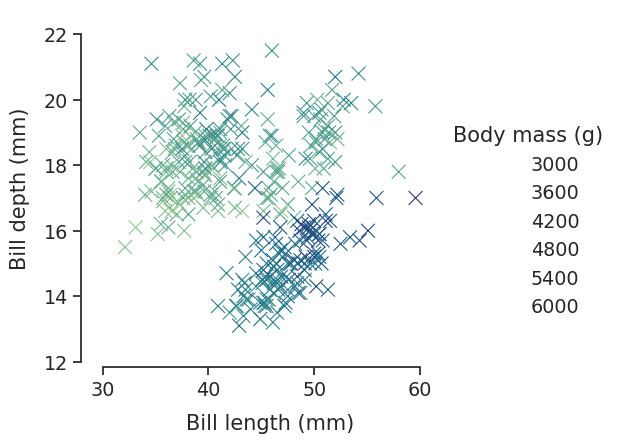

In [61]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

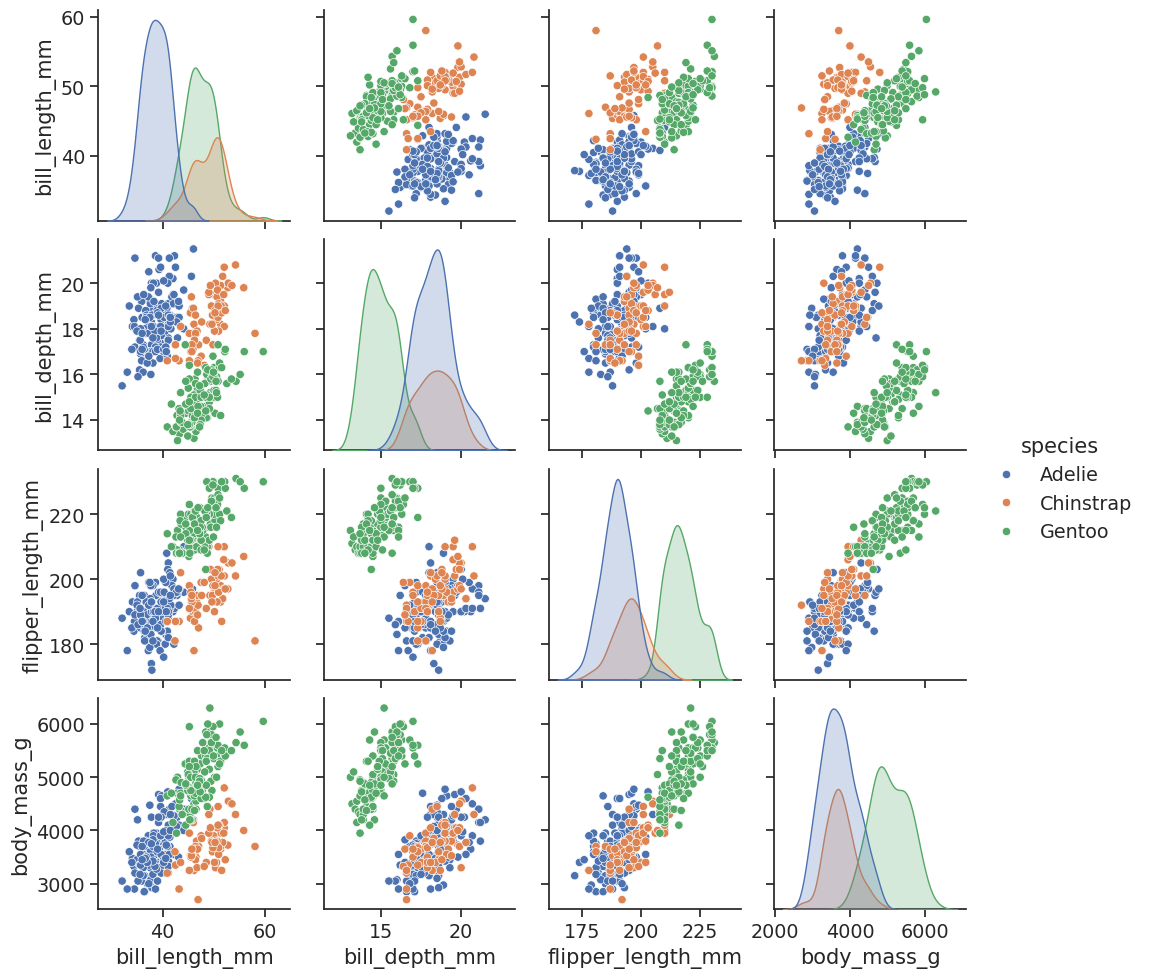

In [66]:
sns.pairplot(penguins, hue="species") 